Found 72 images belonging to 9 classes.
Found 18 images belonging to 9 classes.
Epoch 1/50
2/2 [==============================] - 142s 80s/step - loss: 6.7017 - accuracy: 0.1094 - val_loss: 5.4873 - val_accuracy: 0.2222
Epoch 2/50
2/2 [==============================] - 47s 22s/step - loss: 6.9258 - accuracy: 0.1000 - val_loss: 4.6864 - val_accuracy: 0.1111
Epoch 3/50
2/2 [==============================] - 45s 35s/step - loss: 8.0049 - accuracy: 0.0750 - val_loss: 4.6951 - val_accuracy: 0.1111
Epoch 4/50
2/2 [==============================] - 46s 21s/step - loss: 4.3341 - accuracy: 0.1500 - val_loss: 3.1440 - val_accuracy: 0.2222
Epoch 5/50
2/2 [==============================] - 45s 35s/step - loss: 3.4082 - accuracy: 0.2000 - val_loss: 3.6245 - val_accuracy: 0.2222
Epoch 6/50
2/2 [==============================] - 45s 35s/step - loss: 3.0986 - accuracy: 0.2250 - val_loss: 2.1643 - val_accuracy: 0.2778
Epoch 7/50
2/2 [==============================] - 54s 27s/step - loss: 2.4474 - accur

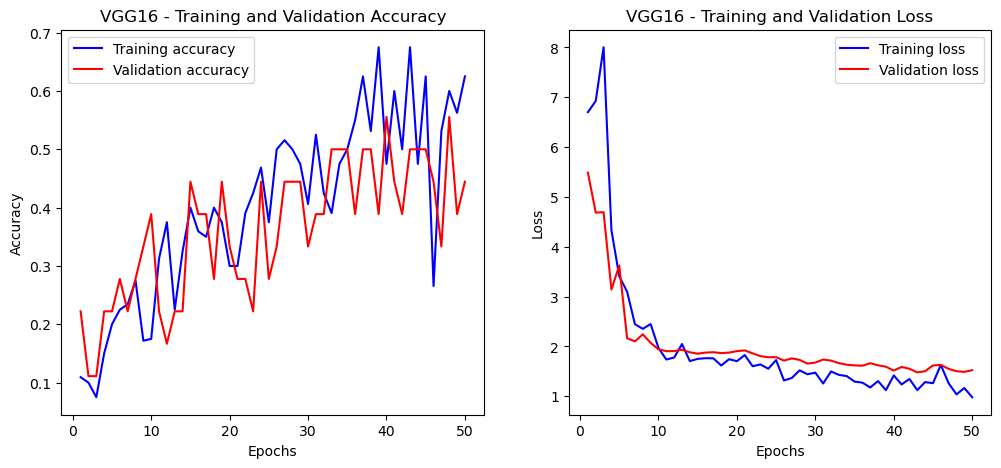

1/1 [==============================] - 33s 33s/step


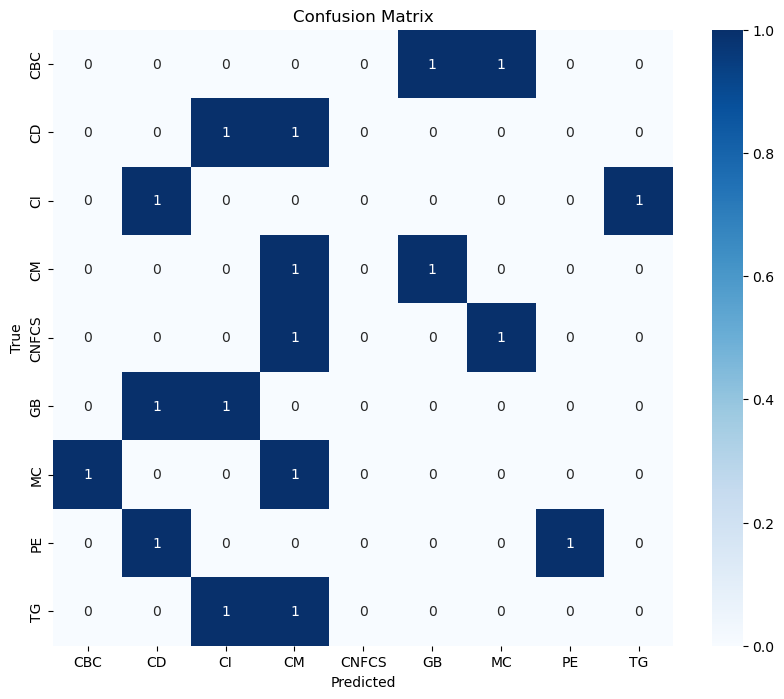

1/1 [==============================] - 13s 13s/step


C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report - VGG16:
               precision    recall  f1-score   support

         CBC       0.00      0.00      0.00         2
          CD       0.00      0.00      0.00         2
          CI       0.00      0.00      0.00         2
          CM       0.20      0.50      0.29         2
       CNFCS       0.00      0.00      0.00         2
          GB       0.00      0.00      0.00         2
          MC       0.00      0.00      0.00         2
          PE       1.00      0.50      0.67         2
          TG       0.00      0.00      0.00         2

    accuracy                           0.11        18
   macro avg       0.13      0.11      0.11        18
weighted avg       0.13      0.11      0.11        18

Epoch 1/50
2/2 [==============================] - 78s 42s/step - loss: 12.6228 - accuracy: 0.1000 - val_loss: 11.9783 - val_accuracy: 0.1111
Epoch 2/50
2/2 [==============================] - 31s 14s/step - loss: 12.8285 - accuracy: 0.1250 - val_loss: 7.5228 - val

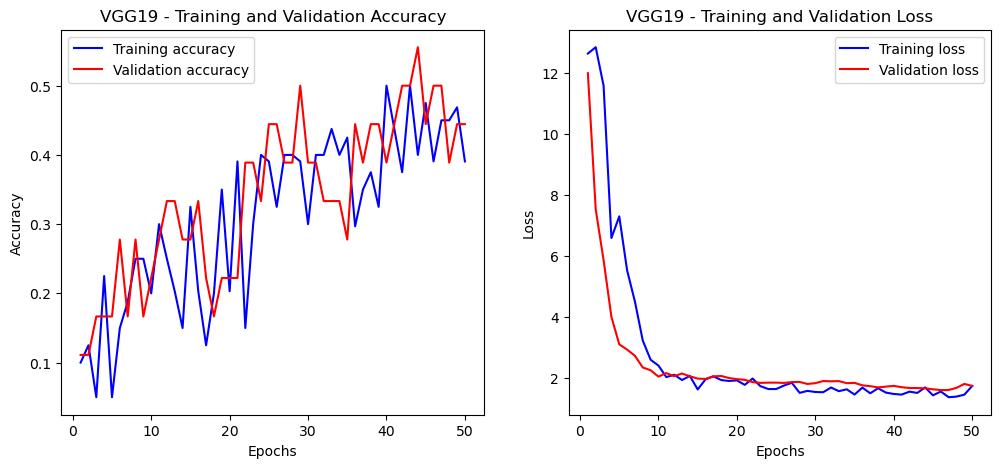

1/1 [==============================] - 38s 38s/step


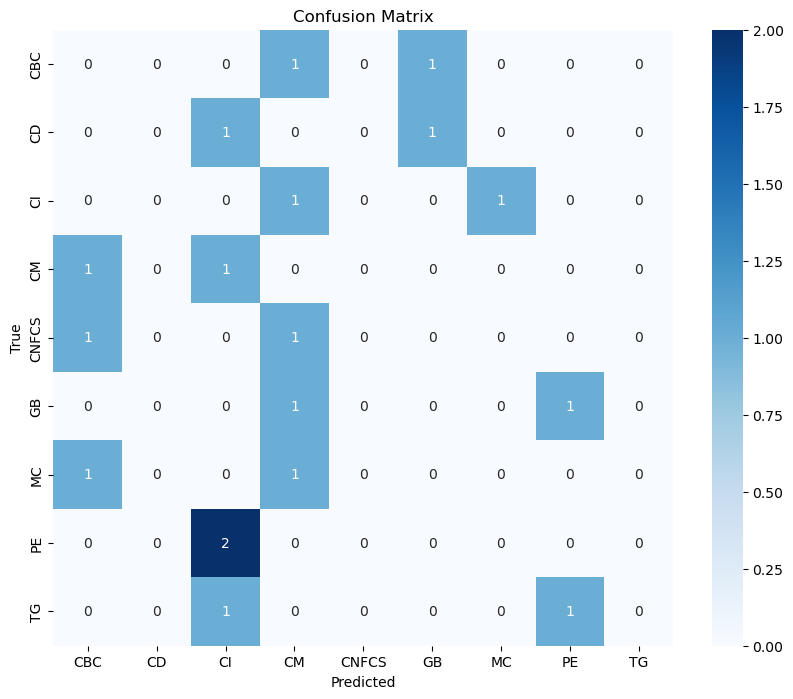

1/1 [==============================] - 13s 13s/step


C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report - VGG19:
               precision    recall  f1-score   support

         CBC       0.00      0.00      0.00       2.0
          CD       0.00      0.00      0.00       2.0
          CI       0.00      0.00      0.00       2.0
          CM       0.00      0.00      0.00       2.0
       CNFCS       0.00      0.00      0.00       2.0
          GB       0.00      0.00      0.00       2.0
          MC       0.00      0.00      0.00       2.0
          PE       0.00      0.00      0.00       2.0
          TG       0.00      0.00      0.00       2.0

    accuracy                           0.00      18.0
   macro avg       0.00      0.00      0.00      18.0
weighted avg       0.00      0.00      0.00      18.0



In [6]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras import models, layers, optimizers
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

data_dir = r"C:\Users\mttvi\OneDrive\Área de Trabalho\DB2\Feijaoseg"

img_size = (256, 256)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

def plot_training(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def plot_confusion_matrix(model, generator):
    y_true = generator.classes
    num_batches = int(np.ceil(generator.samples / batch_size))
    y_pred = []

    for i in range(num_batches):
        batch_x, batch_y = generator.next()
        pred_batch = model.predict(batch_x)
        y_pred.extend(np.argmax(pred_batch, axis=-1))

    y_pred = np.array(y_pred)
    
    cm = confusion_matrix(y_true, y_pred, labels=list(train_generator.class_indices.values()))

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

names = ['CBC', 'CD', 'CI', 'CM', 'CNFCS', 'BG', 'MC', 'PE', 'TG']
#nk = [9, 10, 9, 7, 8, 9, 8, 10, 10]

# VGG16
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg16_model.layers:
    layer.trainable = False

model_vgg16 = models.Sequential()
model_vgg16.add(vgg16_model)
model_vgg16.add(layers.Flatten())
model_vgg16.add(layers.Dense(256, activation='relu'))
model_vgg16.add(layers.Dropout(0.5))
model_vgg16.add(layers.Dense(len(names), activation='softmax'))

model_vgg16.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=math.ceil(val_generator.samples / batch_size)
)

val_loss_vgg16, val_acc_vgg16 = model_vgg16.evaluate(val_generator, steps=math.ceil(val_generator.samples / batch_size))
print(f'VGG16 Validation Accuracy: {val_acc_vgg16 * 100:.2f}%')

plot_training(history_vgg16, 'VGG16')

plot_confusion_matrix(model_vgg16, val_generator)

predictions_vgg16 = model_vgg16.predict(val_generator)
y_true_vgg16 = val_generator.classes
y_pred_vgg16 = np.argmax(predictions_vgg16, axis=1)
class_labels_vgg16 = list(train_generator.class_indices.keys())

print("Classification Report - VGG16:\n", classification_report(y_true_vgg16, y_pred_vgg16, target_names=class_labels_vgg16))

vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg19_model.layers:
    layer.trainable = False

model_vgg19 = models.Sequential()
model_vgg19.add(vgg19_model)
model_vgg19.add(layers.Flatten())
model_vgg19.add(layers.Dense(256, activation='relu'))
model_vgg19.add(layers.Dropout(0.5))
model_vgg19.add(layers.Dense(len(names), activation='softmax'))

model_vgg19.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_vgg19 = model_vgg19.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=math.ceil(val_generator.samples / batch_size)
)

val_loss_vgg19, val_acc_vgg19 = model_vgg19.evaluate(val_generator, steps=math.ceil(val_generator.samples / batch_size))
print(f'VGG19 Validation Accuracy: {val_acc_vgg19 * 100:.2f}%')

# Plotar treinamento
plot_training(history_vgg19, 'VGG19')

# Plotar matriz de confusão
plot_confusion_matrix(model_vgg19, val_generator)

# Classification Report
predictions_vgg19 = model_vgg19.predict(val_generator)
y_true_vgg19 = val_generator.classes
y_pred_vgg19 = np.argmax(predictions_vgg19, axis=1)
class_labels_vgg19 = list(train_generator.class_indices.keys())

print("Classification Report - VGG19:\n", classification_report(y_true_vgg19, y_pred_vgg19, target_names=class_labels_vgg19))